# customer churn

## Importing the libraries 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
df = pd.read_csv("../staging/data_set/master_dataset.csv")

## Prepare data

In [4]:
df["score_date"] = pd.to_datetime(df["score_date"], errors="coerce")

df["year_week"] = df["score_date"].dt.to_period("W").astype(str)

df.sort_values(["id", "year_week"], inplace=True)

## Compute Churn 
 

In [5]:
df['score_date'] = pd.to_datetime(df['score_date'], format='%d-%m-%Y')
df['arr_change'] = df['future_arr'] - df['current_arr']
df['perc_change'] = (df['future_arr'] - df['current_arr']) / df['current_arr']
df['churn_flag'] = (df['future_arr'] < df['current_arr'] * 0.8).astype(int)
 
df.to_csv("../staging/data_set/master_dataset.csv", index=False)

## Add customer churn feature

In [6]:
df.to_csv("../staging/data_set/master_dataset.csv", index=False)

## Visualization

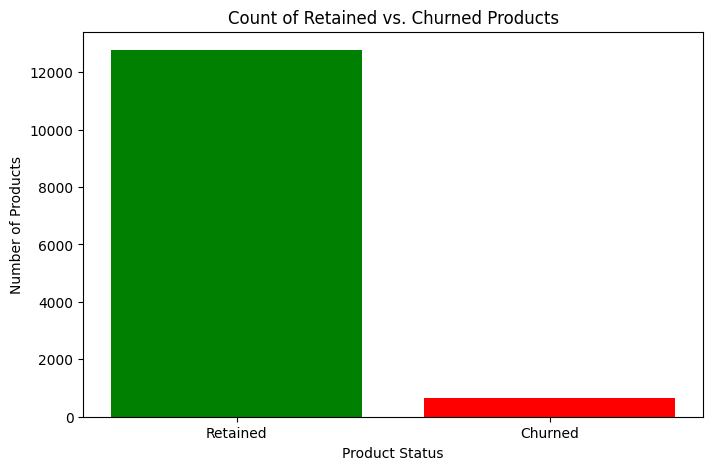

In [8]:
churn_counts = df['churn_flag'].value_counts().sort_index()  # 0 = retained, 1 = churned
plt.figure(figsize=(8, 5))
plt.bar(churn_counts.index, churn_counts.values, color=['green', 'red'])
plt.xticks([0, 1], ['Retained', 'Churned'])
plt.xlabel('Product Status')
plt.ylabel('Number of Products')
plt.title('Count of Retained vs. Churned Products')
plt.show()